# `Exposys Project`

## **Project details**

In the given dataset, R&D Spend, Administration Cost and Marketing Spend of 50 Companies 
are given along with the profit earned. The target is to prepare an ML model which can predict 
the profit value of a company if the value of its R&D Spend, Administration Cost and Marketing 
Spend are given.

### *Tasks to be done*

- **Construct Different Regression algorithms**
- **Divide the data into train set and test set**
- **Calculate different regression metrics**
- **Choose the best model**

### `About the dataset`

Given dataset is about the 50 startups, each of these companies have recorded their R&D spent, Administration Cost, Marketing and their overall profits earned.

*Columns in the Dataset*

- R&D Spend - Cost spent on Research and Development
- Administration Cost - Cost spent on support of business, indirectly related to specific product or service
- Marketing Spend - Cost spent on the marketing of products or services provided by the companies
- Profit - Overall profit earned by the companies

### `Importing the packages`

In [1]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame

import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sb

import sklearn as sk
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import scale, normalize, Binarizer, StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, classification_report

%matplotlib inline
rcParams['figure.figsize'] = 8, 5
sb.set_style('whitegrid')
np.set_printoptions(precision=4, suppress=True)

### `Importing the data`

In [2]:
data = pd.read_csv('50_Startups.csv')

### `Simple Data Description Tasks`

In [3]:
data.head()

,R&D Spend,Administration,Marketing Spend,Profit
0,165349.20,136897.80,471784.10,192261.83
1,162597.70,151377.59,443898.53,191792.06
2,153441.51,101145.55,407934.54,191050.39
3,144372.41,118671.85,383199.62,182901.99
4,142107.34,91391.77,366168.42,166187.94


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   R&D Spend        50 non-null     float64
 1   Administration   50 non-null     float64
 2   Marketing Spend  50 non-null     float64
 3   Profit           50 non-null     float64
dtypes: float64(4)
memory usage: 1.7 KB


In [5]:
data.isnull().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
Profit             0
dtype: int64

In [6]:
data.describe()

,R&D Spend,Administration,Marketing Spend,Profit
count,50.000000,50.000000,50.000000,50.000000
mean,73721.615600,121344.639600,211025.097800,112012.639200
std,45902.256482,28017.802755,122290.310726,40306.180338
min,0.000000,51283.140000,0.000000,14681.400000
25%,39936.370000,103730.875000,129300.132500,90138.902500
50%,73051.080000,122699.795000,212716.240000,107978.190000
75%,101602.800000,144842.180000,299469.085000,139765.977500
max,165349.200000,182645.560000,471784.100000,192261.830000


**The reason for minimum Cost spent on R&D and Marketing being 0.0 is that there might have been some companies which haven't spent on Marketing or R&D which were not either on Research side or Marketing or on both sides but are still making Profit by the services or products they make.**

### `Exploratory Data Analysis`

Distribution plot for R&D Spend, Administration, Marketing Spend, Profit

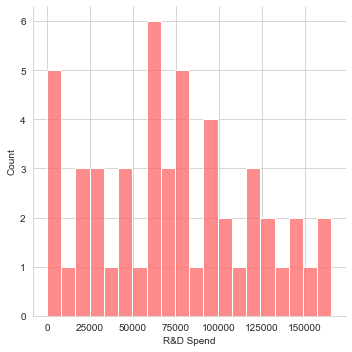

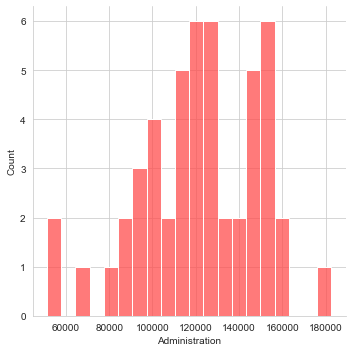

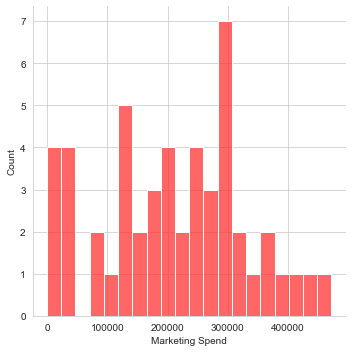

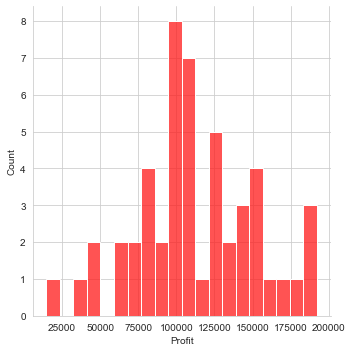

In [7]:
i = 0
color = ['#ff6666', '#ff4d4d', '#ff3333', '#ff1a1a']
for cols in data.columns:
    sb.displot(data=data, x=data[cols], kde=False, color=color[i], bins=20)
    i = i + 1

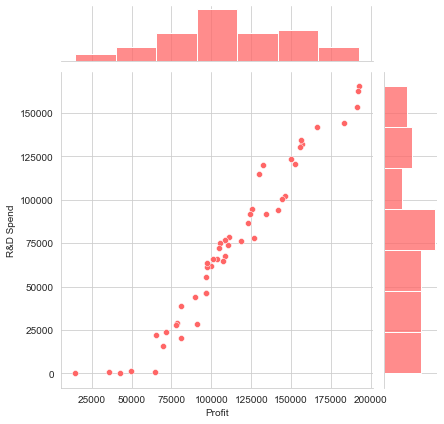

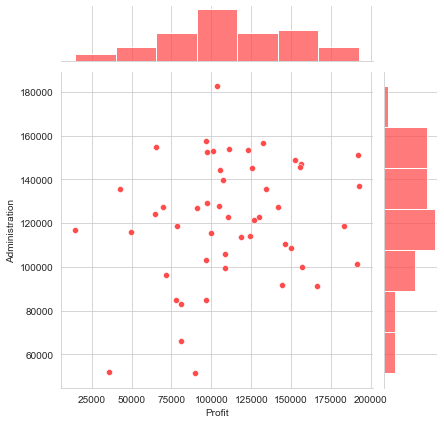

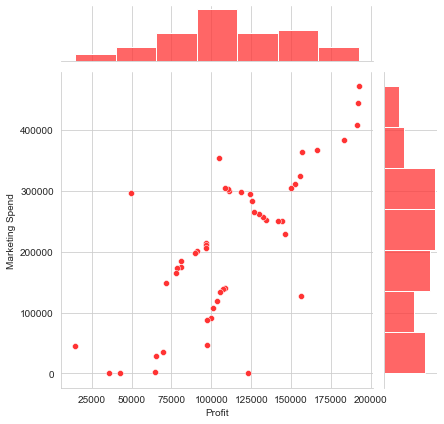

In [8]:
color = ['#ff6666', '#ff4d4d', '#ff3333', '#ff1a1a']
i = 0
for cols in data.columns[:-1]:
    sb.jointplot(data=data, x='Profit', y=cols, kind='scatter', color=color[i])
    i = i + 1

<AxesSubplot:>

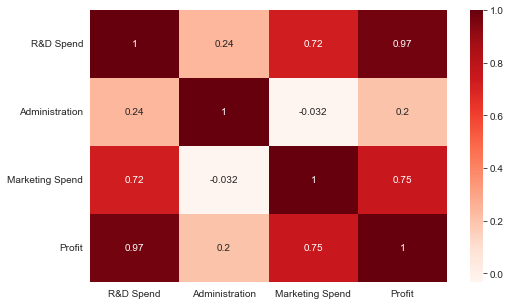

In [9]:
sb.heatmap(data.corr(), annot=True, cmap='Reds')

**The above Heatmap tells us that there is a strong correlation between Profit and R&D spend, Profit and Marketing Spend. Hence we can consider that Spending in Marketing or in R&D can help in Increase of Profit.**

## `Linear Regression`

In [10]:
X = data.iloc[:, :-1].values
y = data['Profit'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(35, 3)
(15, 3)
(35,)
(15,)


In [11]:
linreg = LinearRegression()
linreg.fit(X_train, y_train)

LinearRegression()

In [12]:
y_pred = linreg.predict(X_test)
y_pred

array([ 87628.282 , 108811.3712,  66491.1933,  70483.2373,  48355.2519,
       115516.9822, 171046.9917,  99195.0317, 158593.8531, 157123.2697,
        82824.9386, 178736.7565,  75153.9484,  99216.1611, 133912.8548])

<AxesSubplot:>

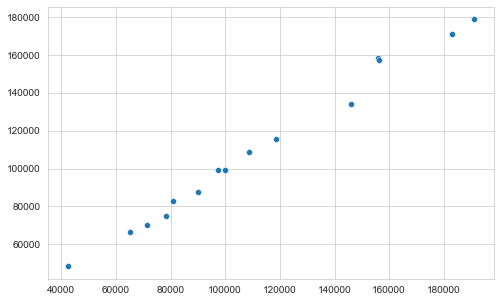

In [13]:
sb.scatterplot(x=y_test, y=y_pred)

In [14]:
acc = []
for i in range(1, 50):
    X_train1, X_test1, y_train1, y_test1 = train_test_split(X, y, test_size=0.3, random_state=i)
    lrg = LinearRegression()
    lrg.fit(X_train1, y_train1)
    
    y_pred1 = lrg.predict(X_test1)
    
    acc.append(r2_score(y_pred1, y_test1))

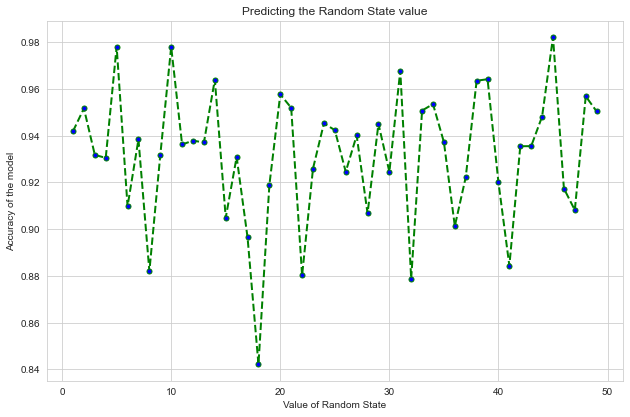

In [15]:
fig = plt.figure()
axes = fig.add_axes([.1, .1, 1, 1])
axes.plot(range(1, 50), acc, lw=2, ls='--', markersize=5, markerfacecolor='blue', color='green', marker='o')
axes.set_xlabel('Value of Random State')
axes.set_ylabel('Accuracy of the model')
axes.set_title("Predicting the Random State value")
plt.show()

In [16]:
print("Accuracy for Linear Regression:", r2_score(y_pred, y_test) * 100)

Accuracy for Linear Regression: 97.80592308313783


## `Ridge Regression`

In [17]:
ridge = Ridge()

parameters = {'alpha': [1e-20, 1e-15, 1e-10, 1e-5, 1e-0, 0, 5, 10, 15, 20, 40, 60, 70, 80, 90, 95, 100, 101]}

ridgeReg = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=30)

ridgeReg.fit(X_train, y_train)

GridSearchCV(cv=30, estimator=Ridge(),
             param_grid={'alpha': [1e-20, 1e-15, 1e-10, 1e-05, 1.0, 0, 5, 10,
                                   15, 20, 40, 60, 70, 80, 90, 95, 100, 101]},
             scoring='neg_mean_squared_error')

In [18]:
ridge_pred = ridgeReg.predict(X_test)

print("Accuracy for Ridge Regression:", r2_score(y_test, ridge_pred) * 100)

Accuracy for Ridge Regression: 98.1491312159712


## `Lasso Regression`

In [19]:
lasso = Lasso()

parameters = {'alpha': [1e-20, 1e-15, 1e-10, 1e-5, 1e-0, 0, 5, 10, 15, 20, 40, 60, 70, 80, 90, 95, 100, 101]}

lassReg = GridSearchCV(lasso, parameters, scoring='neg_mean_squared_error', cv=30)

lassReg.fit(X_train, y_train)

C:\Users\Gouse\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.708e+09, tolerance: 5.141e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linear_model.Ridge/RidgeCV instead.
  model = cd_fast.enet_coordinate_descent(
C:\Users\Gouse\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.705e+09, tolerance: 5.145e+06 Linear regression models with null weight for the l1 regularization term are more efficiently fitted using one of the solvers implemented in sklearn.linea

C:\Users\Gouse\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.654e+09, tolerance: 5.069e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Gouse\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.690e+09, tolerance: 5.142e+06
  model = cd_fast.enet_coordinate_descent(
C:\Users\Gouse\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.632e+09, toleranc

GridSearchCV(cv=30, estimator=Lasso(),
             param_grid={'alpha': [1e-20, 1e-15, 1e-10, 1e-05, 1.0, 0, 5, 10,
                                   15, 20, 40, 60, 70, 80, 90, 95, 100, 101]},
             scoring='neg_mean_squared_error')

In [20]:
lass_pred = lassReg.predict(X_test)

print("Accuracy for Lasso Regression:", r2_score(lass_pred, y_test) * 100)

Accuracy for Lasso Regression: 97.8059251510803


## `Ridge vs Lasso Distribution plots`

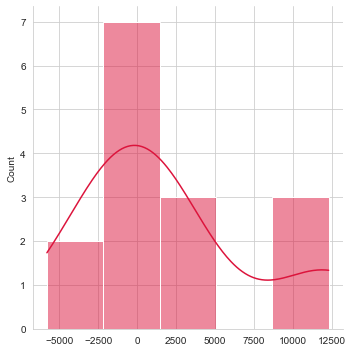

In [21]:
sb.displot((y_test - ridge_pred), kde=True, color='crimson')

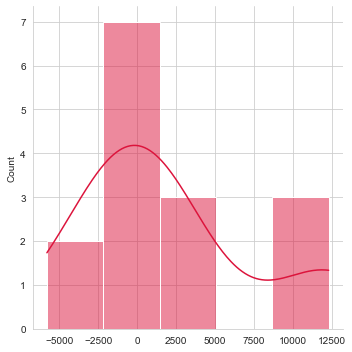

In [22]:
sb.displot((y_test - lass_pred), kde=True, color='crimson')

## `Decision Tree Regressor`

In [23]:
dtreeReg = DecisionTreeRegressor(max_depth=10)
dtreeReg.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=10)

In [24]:
dtree_preds = dtreeReg.predict(X_test)
dtree_preds

array([ 96479.51, 110352.25,  81229.06,  81229.06,  35673.41, 108552.04,
       166187.94,  97483.56, 156991.12, 156991.12,  96479.51, 192261.83,
        77798.83, 107404.34, 144259.4 ])

In [25]:
print("Accuracy for Decision Tree Regressor: ", r2_score(y_test, dtree_preds) * 100)

Accuracy for Decision Tree Regressor:  95.79774398347956


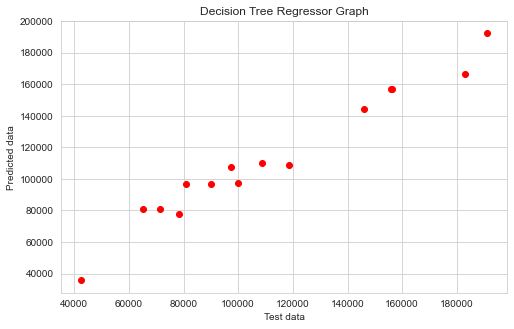

In [26]:
plt.scatter(y_test, dtree_preds, color='red')
plt.xlabel('Test data')
plt.ylabel('Predicted data')
plt.title('Decision Tree Regressor Graph')
plt.show()

## `Random Forest Regressor`

In [27]:
rForestReg = RandomForestRegressor(n_estimators=500)
rForestReg.fit(X_train, y_train)

RandomForestRegressor(n_estimators=500)

In [28]:
rFor_preds = rForestReg.predict(X_test)
rFor_preds

array([ 94427.7221, 107783.6451,  76288.8511,  80074.6054,  34040.4126,
       110396.1187, 164154.1935,  99816.4733, 149141.0625, 148466.5859,
        93514.613 , 179372.6554,  84843.0383, 101786.9987, 140794.1014])

In [29]:
print("Accuracy for Random Forest Regressor: ", r2_score(y_test, rFor_preds) * 100)

Accuracy for Random Forest Regressor:  95.7317566094978


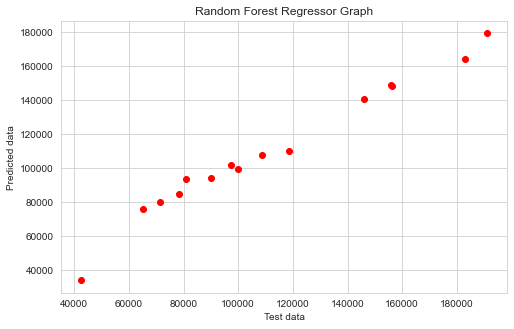

In [30]:
plt.scatter(x=y_test, y=rFor_preds, color='red')
plt.xlabel('Test data')
plt.ylabel('Predicted data')
plt.title('Random Forest Regressor Graph')
plt.show()

## `Support Vector Regressor`

- The points in the data set are linearly separable, hence we use the Linear Kernel in Support Vector Regressor.

In [31]:
svr = SVR(kernel='linear')
svr.fit(X_train, y_train)

SVR(kernel='linear')

In [32]:
svr_preds = svr.predict(X_test)
svr_preds

array([ 86446.262 , 104356.8967,  66005.5134,  67878.6481,  47539.5761,
       111754.2787, 170025.2716, 101124.8887, 157569.1108, 162971.8055,
        80965.2013, 178174.848 ,  71477.1765, 102363.4278, 134725.2857])

In [33]:
print("Accuracy for SVR with Linear Kernel: ", r2_score(y_test, svr_preds) * 100)

Accuracy for SVR with Linear Kernel:  97.50146052080812


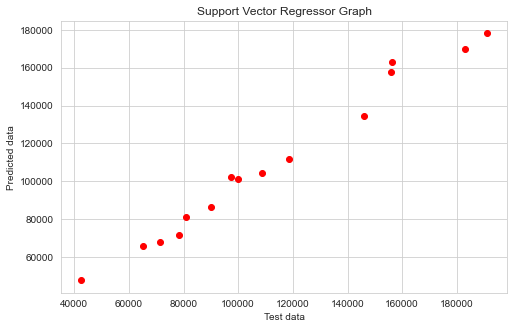

In [34]:
plt.scatter(x=y_test, y=svr_preds, color='red')
plt.xlabel('Test data')
plt.ylabel('Predicted data')
plt.title('Support Vector Regressor Graph')
plt.show()

## `Conclusion`

In [35]:
print("Accuracy for Linear Regression:", r2_score(y_pred, y_test) * 100)
print("Accuracy for Ridge Regression:", r2_score(y_test, ridge_pred) * 100)
print("Accuracy for Lasso Regression:", r2_score(lass_pred, y_test) * 100)
print("Accuracy for Decision Tree Regressor: ", r2_score(y_test, dtree_preds) * 100)
print("Accuracy for Random Forest Regressor: ", r2_score(y_test, rFor_preds) * 100)
print("Accuracy for SVR with Linear Kernel: ", r2_score(y_test, svr_preds) * 100)

Accuracy for Linear Regression: 97.80592308313783
Accuracy for Ridge Regression: 98.1491312159712
Accuracy for Lasso Regression: 97.8059251510803
Accuracy for Decision Tree Regressor:  95.79774398347956
Accuracy for Random Forest Regressor:  95.7317566094978
Accuracy for SVR with Linear Kernel:  97.50146052080812


**The above accuracy test tells us about how well the models have performed with the 50 start-up data set. The data set only has 50 records as a result some models might have failed to deliver better results like Decision Tree Regression which performed very poorly, considering Random Forest Regression has performed much better than the Decision Tree model. Looking at the other models Linear, Ridge, Lasso, SVR have almost similar results with small variations in accuracy. Hence we can conclude that it depends on the model that we select on which data set the model is going to perform well.**